In [1]:
import numpy as np
from scipy import stats

In [40]:
from class_cos import cos_fourier

In [57]:
#参数赋值
bs_sigma=0.3
sigma=0.2          #波动率的波动率
gamma=2          #非仿射系数，取2则为仿射模型
theta=0.01          #波动率的长期均值
kappa=2       #波动率均值恢复速度
v0=0.1          #初始波动率——随时间而变化
r=0.03           #无风险利率
rho=-0.1
rho_f=np.array([-0.1,0.1])  #反馈系数
s0=100          #股票价格——随时间而变化
K=100            #行权价
# tau=1           #到期时间——随时间而变化
'''#师姐m文件中的参数设置
mu=0.05; r=0.03; s0=100; K=100; rho=[-0.1;0.1];
bs_sigma=0.3;
% kappa=2; theta=0.1; v0=0.1; zeta=-0.1; sigma=0.2; %满足feller条件
T=3; delta_t=1/250; tt=0:delta_t:T; steps=length(tt)-1; M=length(rho); aaa=inf; 
'''
bs_sigma=0.3
mu=0.05          #无风险利率  局部预期
zeta=rho
T=3
delta_t=1/250
n=int(T/delta_t +1) #离散长度
array_t=np.arange(0.,T+delta_t,delta_t) #时间离散,包含T界限
array_tau=np.tile(array_t[::-1],(rho_f.size,1))#到期时长

In [58]:
# 用来计算希腊字母，其中v_0，S_0，tau随时间而改变需要传入新值
params={
    'sigma':sigma,          #波动率的波动率
    'gamma':2,     #非仿射系数
    'theta':theta,       #波动率的长期均值
    'kappa':kappa,          #波动率均值恢复速度
#     'v_0':0.09,          #初始波动率
    'r':r,           #无风险利率
    'rho':rho,          #相关系数    
#     'S_0':100,            #股票价格
    'K':K,            #行权价
#     'tau':3,            #到期时间
    'L':10,             #RR和RL里面的东西，建议取10
    'N':200             #级数展开项数，200项够了
}

In [59]:
#初始化t=0时刻的数据
i=0
s=np.zeros((rho_f.size,n)) #2行n列
x=s.copy()
v=s.copy()
y=s.copy()
greek_delta=s.copy()
greek_gamma=s.copy()
greek_theta=s.copy()
bs_delta=s.copy()
bs_gamma=s.copy()
bs_theta=s.copy()
sigma_f=s.copy()
mu_f=s.copy()
# svf模型
s[:,0]=s0
x[:,0]=np.log(s0)
v[:,0]=v0
y[:,0]=np.log(v0)
#SV模型
sv_s=s.copy()
sv_x=x.copy()
sv_v=v.copy()
sv_y=y.copy()
#BS模型
bs_s=s.copy()
bs_x=x.copy()

#希腊字母（每个时刻都有一个希腊值）
# BS模型下的希腊字母
d1=(np.log(s0/K)+(r+0.5*np.square(bs_sigma)*array_tau[:,0]))/bs_sigma*np.sqrt(array_tau[:,0])
d2=(np.log(s0/K)+(r-0.5*np.square(bs_sigma)*array_tau[:,0]))/bs_sigma*np.sqrt(array_tau[:,0])

bs_delta[:,0]
bs_gamma[:,0]=stats.norm.pdf(d1,0,1)/(s[:,0]*bs_sigma*np.sqrt(array_tau[:,0]))
bs_speed[:,0]=stats.norm.pdf(d1,0,1)*(2*r*array_tau[:,0]-d2*bs_sigma*np.sqrt(array_tau[:,0]))/2*array_tau[:,0]*bs_sigma*np.sqrt(array_tau[:,0])
bs_charm[:,0]=stats.norm.pdf(d1,0,1)*(1+d1/(bs_sigma*np.sqrt(array_tau[:,0])))/(np.square(s0)*bs_sigma*np.sqrt(array_tau[:,0]))
#希腊值

# SV模型cos_fourier方法推出的希腊字母
params['S_0']=s0
params['v_0']=v0
params['tau']=T
greeks=cos_fourier(params)
sv_delta[:,0]=greeks.greek_delta() #对s一阶导
sv_gamma[:,0]=greeks.greek_gamma() #delta对s一阶导s二阶导
sv_speed[:,0]=   #mark
sv_charm[:,0]=  # mark %delta对t求导=-delta对tau求导

sigma_f[:,0]=sqrt(v[:,0])/(1-rho_f*s[:,0]*sv_gamma[:,0])
mu_f[:,0]=(mu + \
           rho_f[:,0]*\
           (sv_charm[:,0]+s[:,0]**2 *sv_speed[:,0] *sigma_f[:,0]**2 /2 ))\
        /(1-rho_f*s[:,0]*sv_gamma[:,0])

bs_sigma_f[:,0]=bs_sigma[:,0]/(1-rho_f*s[:,0]*bs_gamma[:,0])
bs_mu_f[:,0]==(mu + \
           rho_f[:,0]*\
           (bs_charm[:,0]+s[:,0]**2 *bs_speed[:,0] *bs_sigma_f[:,0]**2 /2 ))\
        /(1-rho_f*s[:,0]*bs_gamma[:,0])

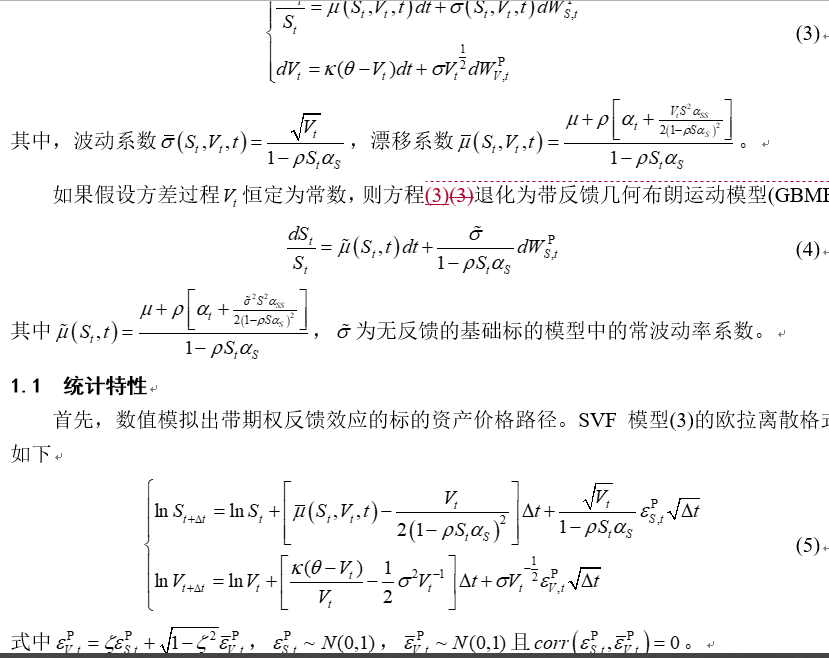

In [39]:
#使用显式差分推下一时刻的值
for i in range(1,n):
    

array([100., 100.])

In [33]:
array_t[::-1]

array([3.   , 2.996, 2.992, 2.988, 2.984, 2.98 , 2.976, 2.972, 2.968,
       2.964, 2.96 , 2.956, 2.952, 2.948, 2.944, 2.94 , 2.936, 2.932,
       2.928, 2.924, 2.92 , 2.916, 2.912, 2.908, 2.904, 2.9  , 2.896,
       2.892, 2.888, 2.884, 2.88 , 2.876, 2.872, 2.868, 2.864, 2.86 ,
       2.856, 2.852, 2.848, 2.844, 2.84 , 2.836, 2.832, 2.828, 2.824,
       2.82 , 2.816, 2.812, 2.808, 2.804, 2.8  , 2.796, 2.792, 2.788,
       2.784, 2.78 , 2.776, 2.772, 2.768, 2.764, 2.76 , 2.756, 2.752,
       2.748, 2.744, 2.74 , 2.736, 2.732, 2.728, 2.724, 2.72 , 2.716,
       2.712, 2.708, 2.704, 2.7  , 2.696, 2.692, 2.688, 2.684, 2.68 ,
       2.676, 2.672, 2.668, 2.664, 2.66 , 2.656, 2.652, 2.648, 2.644,
       2.64 , 2.636, 2.632, 2.628, 2.624, 2.62 , 2.616, 2.612, 2.608,
       2.604, 2.6  , 2.596, 2.592, 2.588, 2.584, 2.58 , 2.576, 2.572,
       2.568, 2.564, 2.56 , 2.556, 2.552, 2.548, 2.544, 2.54 , 2.536,
       2.532, 2.528, 2.524, 2.52 , 2.516, 2.512, 2.508, 2.504, 2.5  ,
       2.496, 2.492,

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [3]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])